In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Task 1.1

In [ ]:
A = np.array([[1, 3, 5], [5, 4, 1], [3, 8, 6]])
A

array([[1, 3, 5],
       [5, 4, 1],
       [3, 8, 6]])

In [ ]:
np.cov(A, rowvar=False, bias=True)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

Covariance = cov(X,Y) = (1/n) * sumation from i=1 to n of (x[i] - mean(x))(y[i] - mean(y))

In [ ]:
def calculateCovariance(X):
    meanX = np.mean(X, axis = 0)
    lenX = X.shape[0]
    X = X - meanX
    covariance = X.T.dot(X)/lenX
    return covariance
calculateCovariance(A)

array([[ 2.66666667,  0.66666667, -2.66666667],
       [ 0.66666667,  4.66666667,  2.33333333],
       [-2.66666667,  2.33333333,  4.66666667]])

Covariance matrix:
 [[ 2.66666667  0.66666667 -2.66666667]
 [ 0.66666667  4.66666667  2.33333333]
 [-2.66666667  2.33333333  4.66666667]]


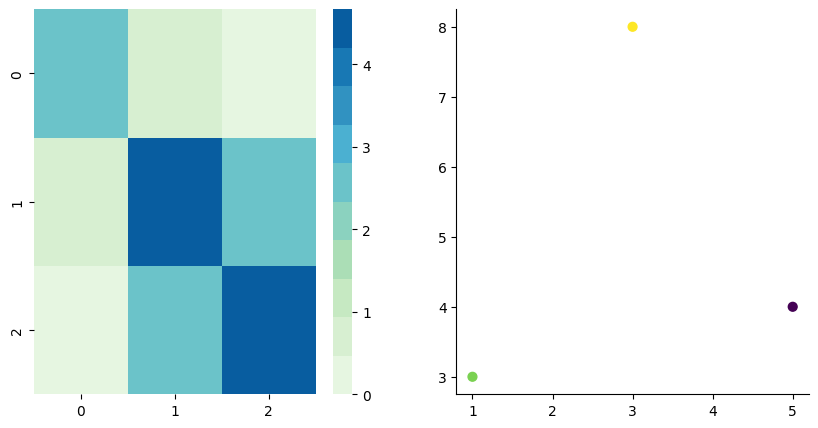

In [ ]:
import seaborn as sns

def plotDataAndCov(data):
    ACov = np.cov(data, rowvar=False, bias=True)
    print ('Covariance matrix:\n', ACov)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(10, 5)

    ax0 = plt.subplot(1, 2, 1)

    # Choosing the colors
    cmap = sns.color_palette("GnBu", 10)
    sns.heatmap(ACov, cmap=cmap, vmin=0)

    ax1 = plt.subplot(1, 2, 2)

    # data can include the colors
    if data.shape[1]==3:
        c=data[:,2]
    else:
        c="#0A98BE"
    ax1.scatter(data[:,0], data[:,1], c=c, s=40)

    # Remove the top and right axes from the data plot
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
plotDataAndCov(A)

Uncorrelated data, one set with mean of 1, one with mean of 2

In [ ]:
np.random.seed(1234)
a1 = np.random.normal(2, 1, 300)
a2 = np.random.normal(1, 1, 300)
A = np.array([a1, a2]).T
A[:10,:]


array([[ 2.47143516,  1.52704645],
       [ 0.80902431,  1.7111124 ],
       [ 3.43270697,  0.78245452],
       [ 1.6873481 ,  3.63779121],
       [ 1.27941127, -0.74213763],
       [ 2.88716294,  0.90556519],
       [ 2.85958841,  2.43118375],
       [ 1.3634765 ,  1.59275845],
       [ 2.01569637,  1.1702969 ],
       [-0.24268495, -0.75170595]])

C:\Users\noaho\AppData\Local\Temp\ipykernel_32028\3009214735.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(A[:,0], color="#53BB04")
C:\Users\noaho\AppData\Local\Temp\ipykernel_32028\3009214735.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(A[:,1], color="#0A98BE")


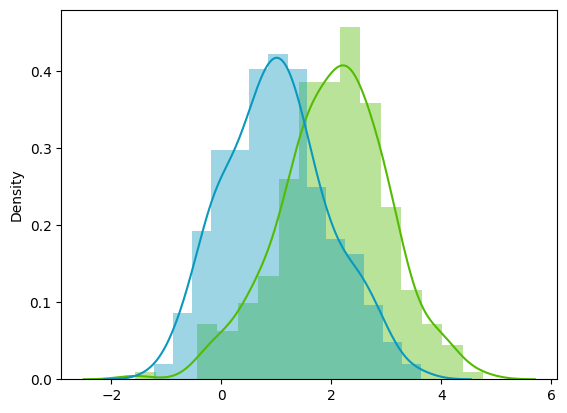

In [ ]:
sns.distplot(A[:,0], color="#53BB04")
sns.distplot(A[:,1], color="#0A98BE")
plt.show()
plt.close()

Covariance matrix:
 [[ 0.95171641 -0.0447816 ]
 [-0.0447816   0.87959853]]


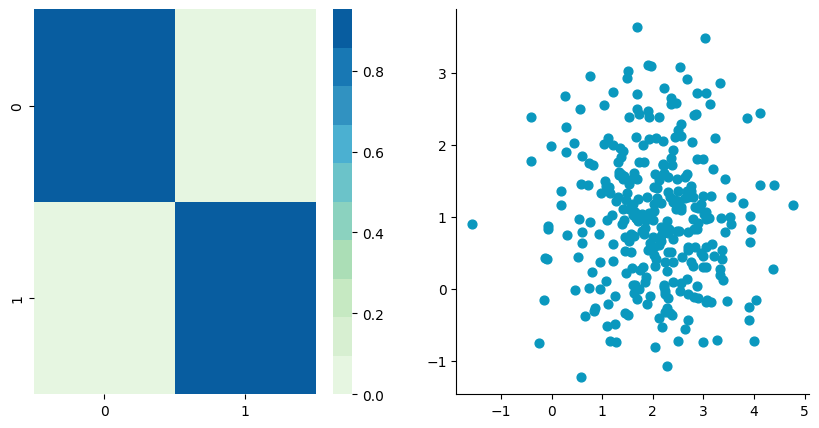

In [ ]:
plotDataAndCov(A)
plt.show()
plt.close()

Correlation of dependent data (b2 influenced by b1)

Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


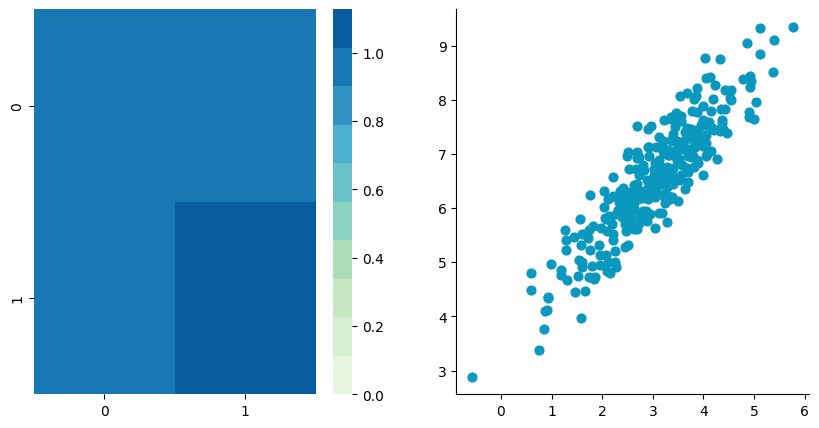

In [ ]:
np.random.seed(1234)
b1 =  np.random.normal(3, 1, 300)
b2 = b1 + np.random.normal(7, 1, 300)/2.
B = np.array([b1, b2]).T
plotDataAndCov(B)
plt.show()
plt.close()

Task 1.2 Pre-Processing

Remove the mean from a dataset to center data around zero

In [ ]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

Before:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


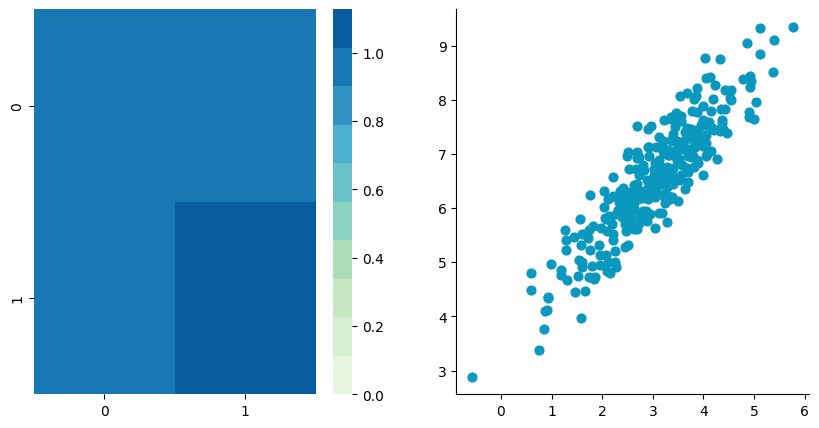

After:


Covariance matrix:
 [[0.95171641 0.92932561]
 [0.92932561 1.12683445]]


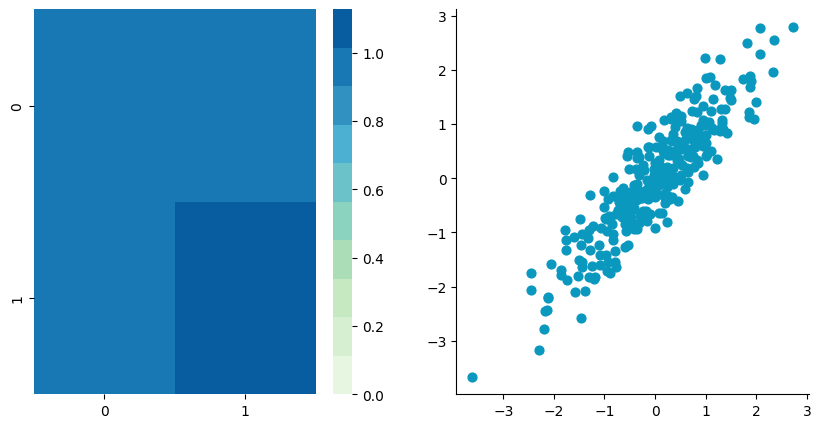

In [ ]:
BCentered = center(B)

print('Before:\n\n')

plotDataAndCov(B)
plt.show()
plt.close()

print('After:\n\n')

plotDataAndCov(BCentered)
plt.show()
plt.close()

^ Data centered on zero on horizontal and vertical axis, but otherwise is the same

Task: Standardization

Standardization serves to put all features on the same scale

In [ ]:
def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

Un re-scaled:

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


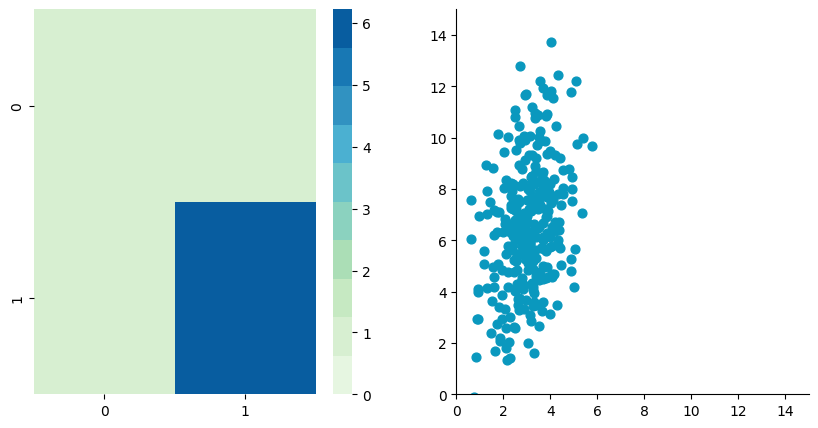

In [ ]:
np.random.seed(1234)
c1 =  np.random.normal(3, 1, 300)
c2 = c1 + np.random.normal(7, 5, 300)/2.
C = np.array([c1, c2]).T

plotDataAndCov(C)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()
plt.close()

Re-scaled:

Note: new covariance matrix is now the correlation matrix below (it is both)

Covariance matrix:
 [[1.         0.34500274]
 [0.34500274 1.        ]]


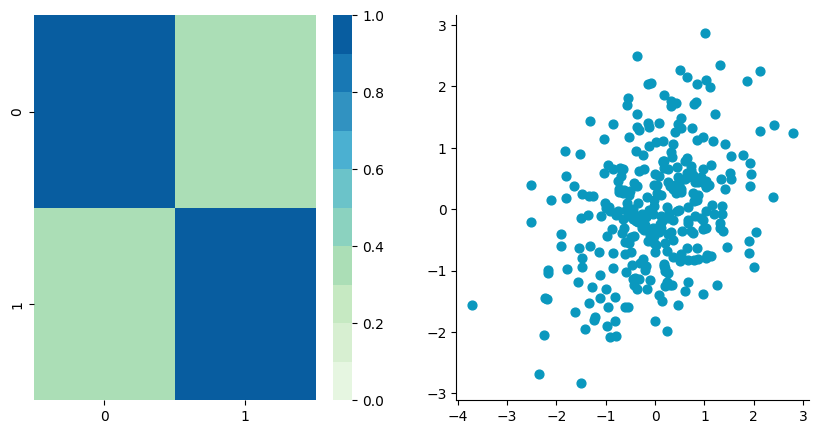

In [ ]:
CStandardized = standardize(C)

plotDataAndCov(CStandardized)
plt.show()
plt.close()

Whitening: Zero Center, De-Correlate, Re-Scale

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


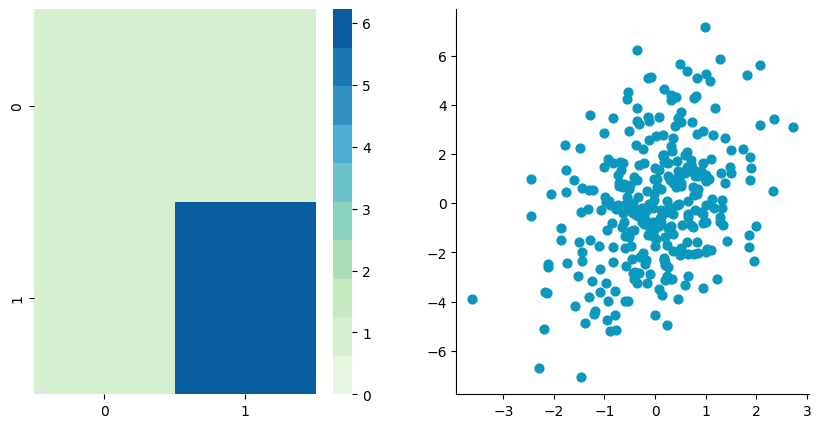

In [ ]:
CCentered = center(C) # Zero centering the data

plotDataAndCov(CCentered)
plt.show()
plt.close()

In [ ]:
# 1- Calculate the covariance matrix
# 2- Calculate the eigenvectors of the covariance matrix
# 3- Apply the matrix of eigenvectors to the data (this will apply the rotation)
def decorrelate(X):
    XCentered = center(X)
    # Calculate the covariance matrix
    cov = np.cov(XCentered, rowvar=False, bias=True)
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    print('Eigenvectors \n%s' %eigVecs)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    decorrelated = center(decorrelated)
    return decorrelated

Covariance matrix:
 [[0.95171641 0.83976242]
 [0.83976242 6.22529922]]


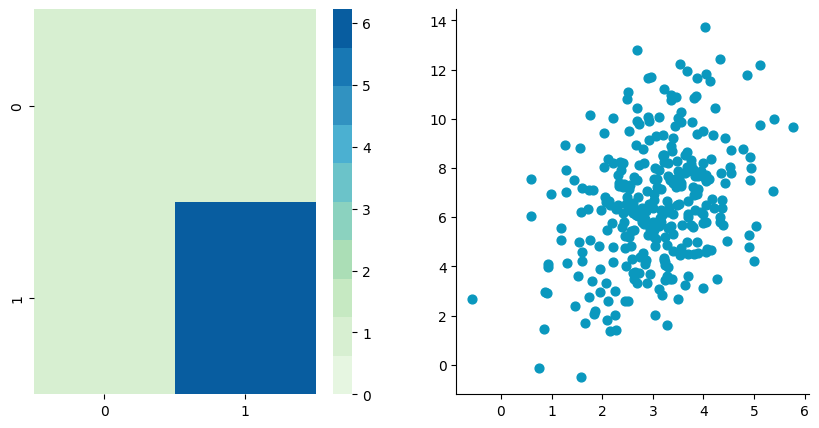

In [ ]:
plotDataAndCov(C)
plt.show()
plt.close()

Eigenvectors 
[[-0.98814067 -0.15355136]
 [ 0.15355136 -0.98814067]]
Covariance matrix:
 [[8.21222171e-01 2.00530087e-16]
 [2.00530087e-16 6.35579346e+00]]


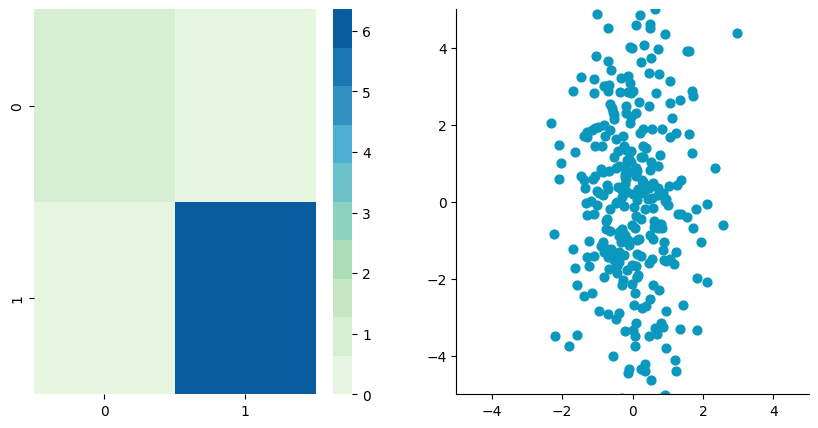

In [ ]:
CDecorrelated = decorrelate(C)
plotDataAndCov(CDecorrelated)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

Image Whitening

In [ ]:
def whiten(X):
    XCentered = center(X)
    cov = XCentered.T.dot(XCentered)/float(XCentered.shape[0])
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    eigVals, eigVecs = np.linalg.eig(cov)
    # Apply the eigenvectors to X
    decorrelated = X.dot(eigVecs)
    # Rescale the decorrelated data
    whitened = decorrelated / np.sqrt(eigVals + 1e-5) # Avoid division by zero
    whitened = center(whitened)
    return whitened

Covariance matrix:
 [[9.99987823e-01 6.89629039e-17]
 [6.89629039e-17 9.99998427e-01]]


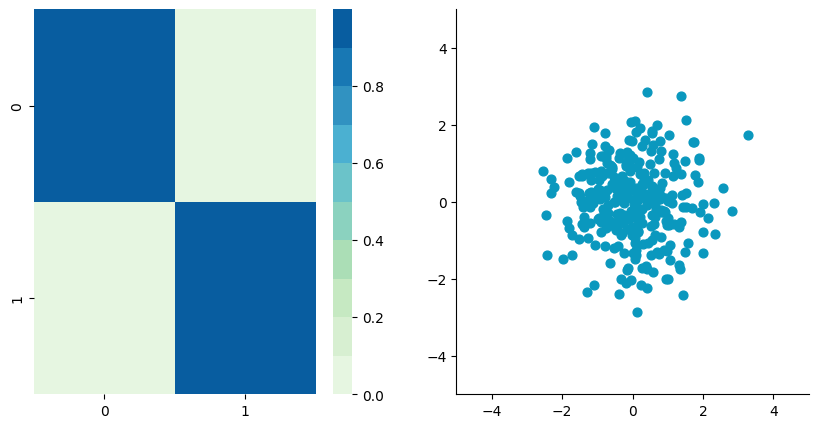

In [ ]:
CWhitened = whiten(C)

plotDataAndCov(CWhitened)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()
plt.close()

^Note that now there is no correlation and the data is centered around 0 with similar horizontal and vertical scale

In [ ]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

In [ ]:
X = X_train[:1000]
print (X.shape) # 1000 samples, 32x32 pixels, 3 channels

(1000, 32, 32, 3)


In [ ]:
# Convert to array with all pixels*channels and photos, shape is now (1000, 32*32*3)
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print (X.shape)

(1000, 3072)


In [ ]:
def plotSample(X, size = 32):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(size,size,3))
    plt.show()
    plt.close()

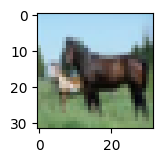

In [ ]:
plotSample(X[12, :]) # Plot the 13th image in the dataset

In [ ]:
X_norm = X / 255. # Normalize the data between 0 and 1, the channel/pixel values are between 0 and 255
print ('X.min()', X_norm.min())
print ('X.max()', X_norm.max())

X.min() 0.0
X.max() 1.0


In [ ]:
X_norm.mean(axis=0).shape # This is mean per pixel, aka the mean of that pixel over all images

(3072,)

In [ ]:
X_norm = X_norm - X_norm.mean(axis=0) # Zero centering the data

In [ ]:
X_norm.mean(axis=0) # These values should be very close to zero

array([-5.30575583e-16, -5.98021632e-16, -4.23439062e-16, ...,
       -1.81965554e-16, -2.49800181e-16,  3.98570066e-17])

In [ ]:
cov = np.cov(X_norm, rowvar=False)
cov.shape # The shape of the covariance matrix should be 3072x3072

(3072, 3072)

In [ ]:
U,S,V = np.linalg.svd(cov)
# "U is the left singular vectors, and S is the singular values of the covariance of the 
# initial normalized dataset of images and X the normalized dataset."
# svd() function is used to compute the factor of an array by Singular Value Decomposition.
# Single value decomposition is a method used to reduce the dimensionality of the data by finding the
# factorization of a real or complex matrix into a rotation, followed by a rescaling followed by another rotation.
print (U.shape, S.shape)

(3072, 3072) (3072,)


In [ ]:
print (np.diag(S)) # The singular values are the diagonal of the matrix S
print ('\nshape:', np.diag(S).shape)

[[5.46967832e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.02861434e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.24476904e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.20778268e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.03489191e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.63132097e-15]]

shape: (3072, 3072)


In [ ]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


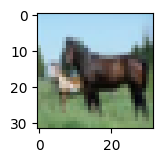

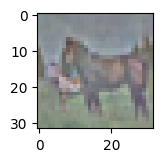

In [ ]:
# Plot image before and after whitening
plotSample(X[12, :])
plotSample(X_ZCA_rescaled[12, :])

^ The image after whitening is similar to those shown in the results in the paper of (Pal & Sudeep (2016)) referenced

This section is for personal dataset handling and preprocessing based off the given example

C:\Users\noaho\AppData\Local\Temp\ipykernel_32028\921045532.py:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imread(formatted_path)


Loaded image  10
Loaded image  20
Loaded image  30
Loaded image  40
(46, 32, 32, 3)
(46, 3072)
Completed covariance calculation, shape:  (3072, 3072)
Completed SVD, Shape of U:  (3072, 3072)  Shape of S:  (3072,)
Completed ZCA whitening, shape:  (46, 3072)


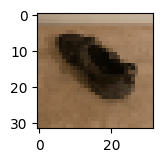

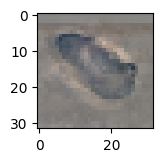

In [ ]:
from heic2png import HEIC2PNG
import glob
import os
from imageio import imread
import cv2

im_w = 32 # I do not seem to have the processing power and memory to do this with larger images

def plotSample(X, size = 32):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(size,size,3))
    plt.show()
    plt.close()

# Load each image in the processing folder
image_names = glob.glob('Processing/*.HEIC')
image_array = np.empty((np.size(image_names), im_w, im_w, 3), dtype=np.uint8)
for(i, image_name) in enumerate(image_names):
    # See if the image exists in the formatted image folder
    # Note on the path: Windows uses backslashes, so we have to split on that
    formatted_path = "Formatted_Images/" + (image_name.split("\\")[-1]).split(".")[0] + ".PNG"
    if(not os.path.exists(formatted_path)):
        img = HEIC2PNG(image_name, quality=90)
        img.save(formatted_path)
    # Load the image
    img = imread(formatted_path)
    # Resize the image by rescaling
    img = cv2.resize(img, (im_w, im_w), interpolation=cv2.INTER_AREA)
    # Convert the image to a numpy array
    img = np.array(img)
    image_array[i] = img
    if(i % 10 == 0 and i > 0):
        print("Loaded image ", i)
print(image_array.shape) # Should be n photos, wxh pixels, 3 channels
# All data should be whitened, so we would fold data AFTER whitening
X = image_array
X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print(X.shape)
X_norm = X / 255. # Normalize the data between 0 and 1, the channel/pixel values are between 0 and 255
X_norm.mean(axis=0).shape # This is mean per pixel, aka the mean of that pixel over all images
X_norm = X_norm - X_norm.mean(axis=0) # Zero centering the data (centering for each pixel)
cov = np.cov(X_norm, rowvar=False) # Calculate the covariance matrix
print("Completed covariance calculation, shape: ", cov.shape)
U,S,V = np.linalg.svd(cov) # Calculate the singular value decomposition
print("Completed SVD, Shape of U: ", U.shape, " Shape of S: ", S.shape)
epsilon = 0.1 # Small value to avoid division by zero and add stability (1.0 / np.sqrt(S) could be really large or divide by zero)
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T
print("Completed ZCA whitening, shape: ", X_ZCA.shape)
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
# Chose random image to show
random = np.random.randint(0, X.shape[0])
plotSample(X[random, :])
plotSample(X_ZCA_rescaled[random, :])


Task 1.2 Import somebody’s else dataset into Jupyter environment:

In [ ]:
from numpy import load

# Took some time to debug that the npy file needs to have .item() called to retrieve the dictionary
vecs = load("vecs.npy", allow_pickle=True).item()
# Ensure vecs is a python dictionary (this assertion helped me debug the above line)
assert type(vecs) is dict
vec_keys = list(vecs.keys())
print(vec_keys)
# The keys given are pos 1-9, representing each position
example_vec_value = vecs[vec_keys[0]]
# print(example_vec_value)
example_vec_value_keys = list(example_vec_value.keys())
print(example_vec_value_keys)
# The value is a dictionary, the keys are indexes (starting from 0 going up to 9)
example_vec_value_value = example_vec_value[example_vec_value_keys[0]]
print(len(example_vec_value_value))
print(example_vec_value_value[0].shape)
print(example_vec_value_value[0])

# The data is formed as a dictionary containing the 9 positions, which each is partitioned into 10 groupings which are the digits 0-9
# Each fold contains roughly 122 images (could vary), and each image has 1024 features (pixels)
# There is no channels, the pixels are grayscale
# This means there are about 122 * 9 * 10 ~= 11000 images in total (just confirming)

# To convert to a numpy array, I will have to store position and digit as labels, while seperating the embeddings
# I will store the label as a tuple, which will be (position, digit)

# From another experiment the total data count is 11302
# With preallocation and simple logic this code is zippy fast (like milliseconds)
embeddings = np.empty((11302, 1024))
labels = np.empty((11302, 2))
index = 0

for(pos, pos_key) in enumerate(vec_keys):
    pos_dict = vecs[pos_key]
    for(digit, digit_key) in enumerate(pos_dict.keys()):
        digit_data = pos_dict[digit_key]
        for(i, embedding) in enumerate(digit_data):
            label = (pos, digit)
            # Store the embedding and label
            embeddings[index] = embedding
            labels[index] = label
            index += 1
            
print(embeddings.shape)
print(labels.shape)


['1_pos', '2_pos', '3_pos', '4_pos', '5_pos', '6_pos', '7_pos', '8_pos', '9_pos']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
122
(1024,)
[-0.       -0.       -0.       ... -0.       -0.        9.227847]
(11302, 1024)
(11302, 2)


In [ ]:
# ^ The above is great and all, but it is difficult to randomize the data 
# while it is seperated, so I will actually pair data and label
# This will make it easier to shuffle the data
# The last two indexes are the position and digit labels

paired_data = np.empty((11302, 1026))
paired_data[:,:1024] = embeddings
paired_data[:,1024:] = labels
print(paired_data.shape)
# Shuffle the data
np.random.shuffle(paired_data)
# Split the data into the embeddings and labels
shuffled_embeddings = paired_data[:,:1024]
shuffled_labels_float = paired_data[:,1024:]
# Convert the labels to integers
# First add 0.1 to avoid incorrect labels (ex for a value 6.999 instead of 7) 
# (this should not be a problem, would be with doubles instead of floats)
shuffled_labels_float += 0.1
shuffled_labels = shuffled_labels_float.astype(int)
print(shuffled_embeddings.shape)
print(shuffled_labels.shape)
print("Ex. Shuffled Labels: ", shuffled_labels[:10])

# Assert that the labels are correct
assert(max(shuffled_labels[:,0]) == 8)
assert(max(shuffled_labels[:,1]) == 9)
assert(min(shuffled_labels[:,0]) == 0)
assert(min(shuffled_labels[:,1]) == 0)

# One thing to note is that the position is now zero indexed digit instead of 1 indexed string like "pos_1"

(11302, 1026)
(11302, 1024)
(11302, 2)
Ex. Shuffled Labels:  [[0 8]
 [5 1]
 [7 7]
 [8 2]
 [3 1]
 [0 9]
 [0 5]
 [8 2]
 [2 6]
 [6 3]]


^Doing the above importing of another persons data took roughly 1 1/2 to 2 hours, mostly on debugging :)

3. Nearest Neighbour classifier: skills of working with datasets and
hyperparameters

In [ ]:
from keras.datasets import mnist

In [ ]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [ ]:
Xtr.shape

(60000, 28, 28)

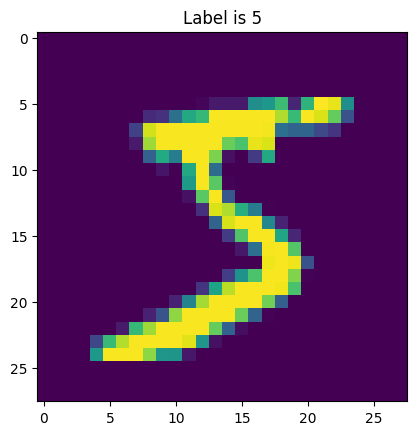

In [ ]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()


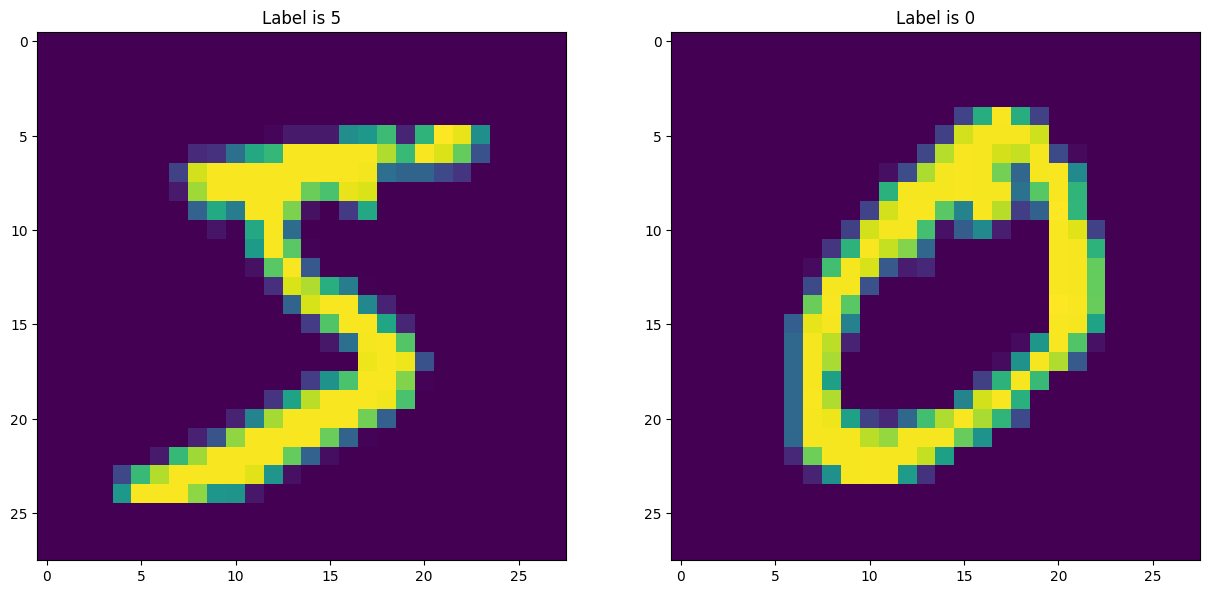

In [ ]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(1,2,1)
ax1=plt.subplot(1,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()


In [ ]:
28*28

784

In [ ]:
#Training phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype()
Tr_set.shape

(500, 784)

In [ ]:
def predict(X, function = 1):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        # Calculate the distances
        if function == 0: distances=np.sum(np.abs(Tr_set.astype(np.float64)-X[i,:].astype(np.float64)),axis=1) # L1 norm
        else: distances=np.sqrt(np.sum(np.square(Tr_set.astype(np.float64)-X[i,:].astype(np.float64)),axis=1)) # L2 norm
        # Take the index of the minimum distance
        min_index= np.argmin(distances)
        # Get the label of the minimum distance
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [ ]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))



Accuracy: 0.8294


Notes for Nearest Neighbour classifier: skills of working with datasets and
hyperparameters

The accuracy of the initial 1-NN using L1 classifier is 0.2649, since there is 10 classes random would be 0.1, and this classifier is not accurate. The accuracy of the 1-NN using L2 classifier is 0.19, which is worse

After (lengthy) investigation, I realized the issue was with data types. I was lost for a while, and then I was thinking about why the L2 might have a worse value when I realized value clipping (negative and 256+) was the issue.
The new accuracy for the L2 classifier using 1-NN is 0.829, which is much better, still less than expected for just reading digits

Below is the updated predict function using L2 norm but with N nearest neighbors

In [ ]:
def predict(X, n = 5):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        # Calculate the distances using L2 norm
        distances=np.sqrt(np.sum(np.square(Tr_set.astype(float)-X[i,:].astype(float)),axis=1))
        # Find the n smallest distances
        min_indexes=np.argsort(distances)[:n]
        # Get the labels of the n smallest distances
        closest_labels=Ltr_set[min_indexes]
        # Get the most common label
        Lpred[i]=np.argmax(np.bincount(closest_labels))
    return Lpred

Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.7953


^ Refactored code to allow n nearest neighbors, values above 1 seems to have gradually decreasing accuracy however, which is unanticapited with a sample count of 500 among 10 classes (50 per class)

In [ ]:
# Function for determining best N
def determineBestN(folds = 3, min_k = 1, max_k = 20):
    num_train=Tr_set.shape[0]
    # Take first 1/folds of the training data as the cross validation set
    fold_size = int(num_train / folds)
    cv_set = Tr_set[:fold_size]
    Lcv_set = Ltr_set[:fold_size]
    # Take the rest as the training set
    Tr_set_fold = Tr_set[fold_size:]
    Ltr_set_fold = Ltr_set[fold_size:]
    best_n = 1
    best_accuracy = 0
    for n in range(min_k, max_k + 1):
        accuracy = 0
        for i in range(fold_size):
            # Calculate the distances from each point in the cross validation set to the training set
            distances = np.sqrt(np.sum(np.square(Tr_set_fold.astype(float)-cv_set[i,:].astype(float)),axis=1))
            # Find the n smallest distances
            min_indexes = np.argsort(distances)[:n]
            # Get the labels of the n smallest distances
            closest_labels = Ltr_set_fold[min_indexes]
            # Get the most common label
            Lpred = np.argmax(np.bincount(closest_labels))
            # Check if the prediction is correct
            if Lpred == Lcv_set[i]:
                accuracy += 1
        accuracy /= fold_size
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n = n
    
    print("Best n: ", best_n, " with estimated accuracy: ", best_accuracy)
    return best_n
# Refactored predict using best determined N and L2 norm
def predict(X):
    best_n = determineBestN()
    num_test=X.shape[0]

    # Result will use full dataset, so we can calculate the accuracy
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        # Calculate the distances using L2 norm
        distances=np.sqrt(np.sum(np.square(Tr_set.astype(float)-X[i,:].astype(float)),axis=1))
        # Find the n smallest distances
        min_indexes=np.argsort(distances)[:best_n]
        # Get the labels of the n smallest distances
        closest_labels=Ltr_set[min_indexes]
        # Get the most common label
        Lpred[i]=np.argmax(np.bincount(closest_labels))
    return Lpred

Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Best n:  3  with estimated accuracy:  0.8253012048192772
Accuracy: 0.8061


It seems that the size of the training data is an issue (not enough data, and data of the same class is not similar enough)

The best determined n was 3, which has a cross validation accuracy of 0.825. The accuracy of the prediction using k=3 was 0.806, lower than the accuracy of n=1. The results are heavily influenced by the size of the dataset, particularly in the result there is many images compared to a training set of 500, in the best N prediction there is 1/3 of 500 compared against 2/3 of 500. This would result in roughly 16 items of each class being compared against 33 training images of the same class. With the larger dataset, it seems to benefit more from hyperfitting (n=1) which may be due to the way the data was collected (some digits are very similar, others made by another person). This seems counter-intuitive, so i will have to research this more.

3. Support Vector Machines

In [ ]:
# Import the Iris dataset, which exists on sklearn
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print(X.shape)
print(y.shape)
print(y[:50])
print(y[50:100])
print(y[100:])
print(X[0])
# As seen from printing, 4 classifiers/, 150 samples
# These are in order, as seen from printing there are 50 samples of each flower type



(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
[5.1 3.5 1.4 0.2]


In [ ]:
# Split the data into training and testing data. Ration should be 4:1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
# The data is now split into training and testing data, with 80% training and 20% testing, random seeded with 69420 to be reproducible
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# As seen, the data is now split into 120 training samples and 30 testing samples, which is 4:1 ratio


(120, 4)
(30, 4)
(120,)
(30,)


Accuracy for  linear   ovo  kernel:  1.0
F1 Scores for  linear   ovo  kernel:  [1. 1. 1.]


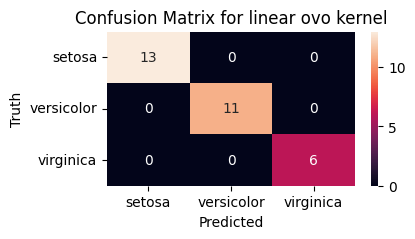

Accuracy for  linear   ovr  kernel:  1.0
F1 Scores for  linear   ovr  kernel:  [1. 1. 1.]


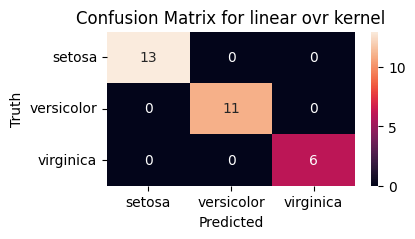

Accuracy for  poly   ovo  kernel:  1.0
F1 Scores for  poly   ovo  kernel:  [1. 1. 1.]


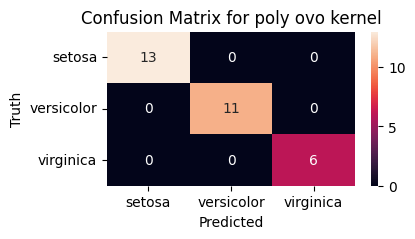

Accuracy for  poly   ovr  kernel:  1.0
F1 Scores for  poly   ovr  kernel:  [1. 1. 1.]


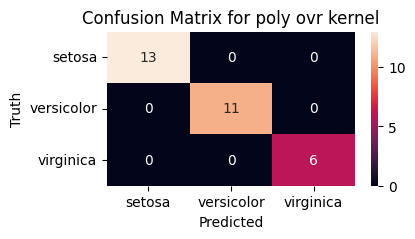

Accuracy for  rbf   ovo  kernel:  1.0
F1 Scores for  rbf   ovo  kernel:  [1. 1. 1.]


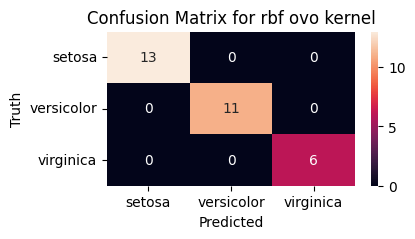

Accuracy for  rbf   ovr  kernel:  1.0
F1 Scores for  rbf   ovr  kernel:  [1. 1. 1.]


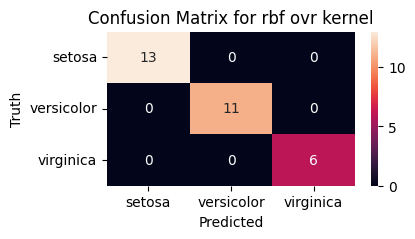

In [ ]:
# Construct confusion matrices for one-vs-one and one-vs-rest training approaches and each kernel type.
# The kernal types are linear, polynomial, and rbf
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Train model
def trainSVC(kernel_type, aproach, feat_range = (0, 10000)):
    feat_range = (max(feat_range[0], 0), min(feat_range[1], X_train.shape[1]))
    # Limit the features to the range
    X_train_limited = X_train[:,feat_range[0]:(feat_range[1]+1)]
    # Construct the SVM model
    model = SVC(kernel=kernel_type, decision_function_shape=aproach)
    clf = model.fit(X_train_limited, y_train)
    return model, clf

# Function for constructing confusion matrices
def constructConfusionMatrices(model):
    # Predict the test data
    y_pred = model.predict(X_test)
    # Construct the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = np.trace(cm) / np.sum(cm) # Trace returns along the diagnoal which is the correct predictions
    # F1 score is based on the harmonic mean of precision and recall, which are based on false pos and false negatives
    # F1 = 2 * (precision * recall) / (precision + recall)
    # Precision = True Positives / (True Positives + False Positives)
    # Recall = True Positives / (True Positives + False Negatives)
    f1scores = np.zeros(3) # Three classes
    for i in range(3):
        precision = cm[i,i] / np.sum(cm[:,i])
        recall = cm[i,i] / np.sum(cm[i,:])
        f1scores[i] = 2 * (precision * recall) / (precision + recall)
    return cm, accuracy, f1scores

# Function for displaying the confusion matrix
def displayConfusionMatrix(cm, kernel_type = "linear", aproach='ovo'):
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Confusion Matrix for ' + kernel_type + ' ' + aproach + ' kernel')
    plt.show()
    plt.close()

# Loop through each kernel type and training approach to construct and display the confusion matrix
for kernel in ['linear', 'poly', 'rbf']:
    for aproach in ['ovo', 'ovr']:
        model, clf = trainSVC(kernel, aproach)
        cm, accuracy, f1scores = constructConfusionMatrices(model)
        print("Accuracy for ", kernel, " ", aproach, " kernel: ", accuracy)
        print("F1 Scores for ", kernel, " ", aproach, " kernel: ", f1scores)
        displayConfusionMatrix(cm, kernel, aproach)

There was no error among any of the kernals or aproaches, so they all performed equally.

Below is the 2d plotting of decision boundries on models trained on just two features using one v rest methodology

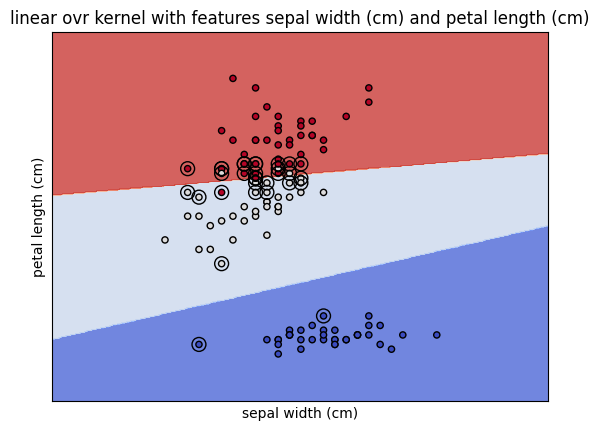

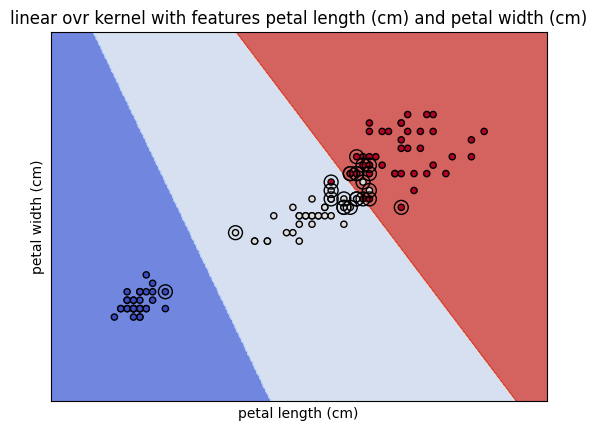

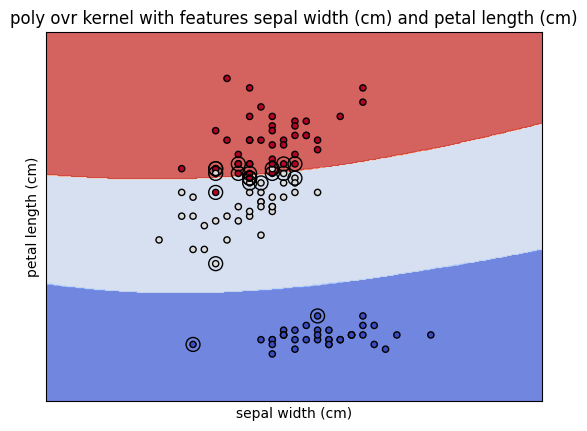

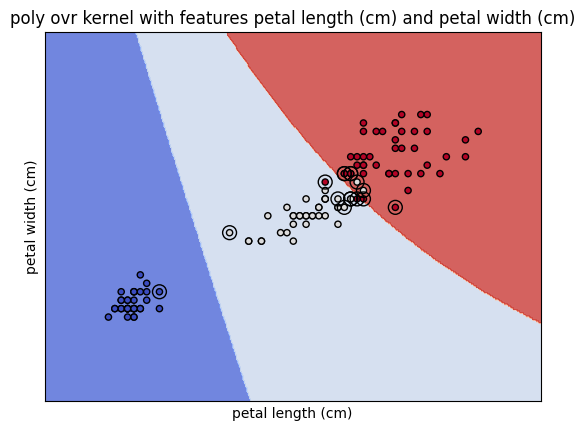

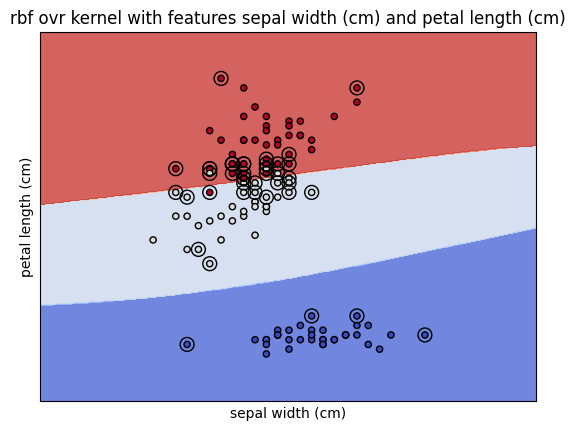

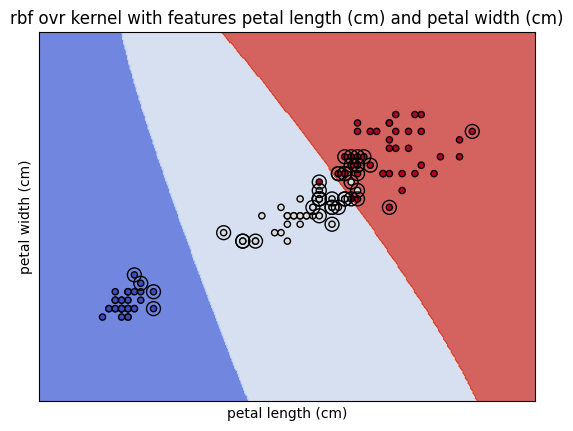

In [ ]:
import matplotlib.pyplot as plt
# Extract the support vectors for each class in one-vs-rest training case.
# Loop through each kernel type

# Functionality for plotting the decision boundary
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

for kernel in ['linear', 'poly', 'rbf']:
    aproach = "ovr"
    for feat_range in [(1,2), (2,3)] :
        model, clf = trainSVC(kernel, aproach, feat_range)
        # Get the support vectors
        support_vectors = clf.support_vectors_
        # Plot the support vectors
        fig, ax = plt.subplots()
        X0, X1 = X_train[:, feat_range[0]], X_train[:, feat_range[1]]
        xx, yy = make_meshgrid(X0, X1)
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel(feature_names[feat_range[0]])
        ax.set_ylabel(feature_names[feat_range[1]])
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(kernel + " " + aproach + " kernel with features " + feature_names[feat_range[0]] + " and " + feature_names[feat_range[1]])
        plt.show()
        plt.close()
        

